In [25]:
import os
import sys

sys.path.insert(0, '../')

In [15]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (18.0, 10.0)

import matplotlib.pyplot as plt


In [26]:
from src.models.model_common import select_features
from src.models.train_model import generate_test_train_split

/Users/sreejithkrishnanr/Tools/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sreejithkrishnanr/Tools/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sreejithkrishnanr/Tools/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sreejithkrishnanr/Tools/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sreejithkrishnanr/Tools/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. E

In [7]:
train_data = pd.read_hdf('../data/processed/train_3600000000000.hd5', 'data', parse_dates=[1])
train_data.head()

,ForecastId,Timestamp,obs_id,SiteId,Value,Frequency,DayOfMonth,DayOfWeek,DayOfYear,DaysInMonth,...,ConsumptionPerSurfaceArea,ConsumptionPerTemperatureDiff,ConsumptionDailyMeanPerSurfaceArea,ConsumptionDailyMeanPerTemperatureDiff,ConsumptionWeeklyMeanPerSurfaceArea,ConsumptionWeeklyMeanPerTemperatureDiff,ConsumptionBiWeeklyMeanPerSurfaceArea,ConsumptionBiWeeklyMeanPerTemperatureDiff,ConsumptionMonthlyMeanPerSurfaceArea,ConsumptionMonthlyMeanPerTemperatureDiff
0,5,2013-01-01 01:00:00,4382312,2,30159.963708,3.600000e+12,1,1,1,31,...,4.945652,93.086308,7.071668,133.101861,12.946466,243.676407,13.486268,253.836467,13.703683,257.928627
1,5,2013-01-01 02:00:00,2016541,2,29793.536720,3.600000e+12,1,1,1,31,...,4.885565,91.955360,7.071668,133.101861,12.946466,243.676407,13.486268,253.836467,13.703683,257.928627
2,5,2013-01-01 03:00:00,78869,2,31682.412161,3.600000e+12,1,1,1,31,...,5.195304,97.785223,7.071668,133.101861,12.946466,243.676407,13.486268,253.836467,13.703683,257.928627
3,5,2013-01-01 04:00:00,1361014,2,29881.829185,3.600000e+12,1,1,1,31,...,4.900043,92.227868,7.071668,133.101861,12.946466,243.676407,13.486268,253.836467,13.703683,257.928627
4,5,2013-01-01 05:00:00,129169,2,30560.328940,3.600000e+12,1,1,1,31,...,5.011304,94.322003,7.071668,133.101861,12.946466,243.676407,13.486268,253.836467,13.703683,257.928627


In [159]:
site_data = train_data.loc[train_data['SiteId'] == 77, :]
site_data.head()

site_data['IsHoliday'] = site_data['IsHoliday'].astype(int)

/Users/sreejithkrishnanr/Tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [149]:
site_data.set_index('Timestamp').loc[site_data.set_index('Timestamp')['ForecastId'] == 4021, :][['TemperatureMean', 'Consumption', 'IsHoliday']].iloc[:100, :].plot(subplots=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [160]:
x, y, groups, ts = select_features(site_data, 'h')

x.keys()

Index(['IsLeapYear', 'IsMonthEnd', 'IsMonthStart', 'IsQuarterEnd',
       'IsQuarterStart', 'IsYearEnd', 'IsYearStart', 'DayOfMonth_cos',
       'DayOfMonth_sin', 'DayOfWeek_cos', 'DayOfWeek_sin', 'DayOfYear_cos',
       'DayOfYear_sin', 'Hour_cos', 'Hour_sin', 'Month_cos', 'Month_sin',
       'Quarter_cos', 'Quarter_sin', 'WeekOfYear_cos', 'WeekOfYear_sin',
       'IsSpecialHoliday', 'IsWeekend', 'IsHoliday', 'ConsumptionDailyMean',
       'ConsumptionWeeklyMean', 'ConsumptionBiWeeklyMean',
       'ConsumptionMonthlyMean', 'PotentialMeanHeating',
       'PotentialMeanCooling', 'PotentialMinHeating', 'PotentialMaxHeating',
       'PotentialMinCooling', 'PotentialMaxCooling',
       'PotentialDailyMeanHeating', 'PotentialDailyMeanCooling',
       'PotentialWeeklyMeanHeating', 'PotentialWeeklyMeanCooling',
       'PotentialMonthlyMeanHeating', 'PotentialMonthlyMeanCooling',
       'PotentialQuarterlyMeanHeating', 'PotentialQuarterlyMeanCooling',
       'PotentialYearlyMeanHeating', 'Pote

In [161]:
from scipy.stats import zscore

scale_keys = [
    'ConsumptionDailyMean',
    'ConsumptionWeeklyMean', 'ConsumptionBiWeeklyMean',
    'ConsumptionMonthlyMean', 'PotentialMeanHeating',
    'PotentialMeanCooling', 'PotentialMinHeating', 'PotentialMaxHeating',
    'PotentialMinCooling', 'PotentialMaxCooling',
    'PotentialDailyMeanHeating', 'PotentialDailyMeanCooling',
    'PotentialWeeklyMeanHeating', 'PotentialWeeklyMeanCooling',
    'PotentialMonthlyMeanHeating', 'PotentialMonthlyMeanCooling',
    'PotentialQuarterlyMeanHeating', 'PotentialQuarterlyMeanCooling',
    'PotentialYearlyMeanHeating', 'PotentialYearlyMeanCooling',
    'DistanceMean', 'DistanceVariance', 'NumStations',
    'TemperatureVariance'
]
x_s = x[list(set(x.keys()) - set(scale_keys))].join(x[scale_keys].apply(zscore))
y_s = (y - y.mean()) / y.std()

/Users/sreejithkrishnanr/Tools/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [173]:
def make_ts_data(x, y, groups, ts):
    timestamps = pd.DataFrame({
        'Date': ts.dt.date,
        'Hour': ts.dt.hour
    })
    
    days = timestamps.groupby('Date')['Date'].first().values
    
    common_columns = [
        'IsMonthEnd', 'IsMonthStart', 'IsQuarterEnd',
        'IsQuarterStart', 'DayOfMonth_cos',
        'DayOfMonth_sin', 'DayOfWeek_cos', 'DayOfWeek_sin', 'DayOfYear_cos',
        'DayOfYear_sin', 'Month_cos', 'Month_sin',
        'Quarter_cos', 'Quarter_sin',
        'IsSpecialHoliday', 'IsWeekend'
    ]
    
    common_avg_columns = [
        'ConsumptionDailyMean',
        'ConsumptionWeeklyMean', 'ConsumptionBiWeeklyMean',
        'ConsumptionMonthlyMean',
        'PotentialDailyMeanHeating', 'PotentialDailyMeanCooling',
        'PotentialWeeklyMeanHeating', 'PotentialWeeklyMeanCooling',
        'PotentialMonthlyMeanHeating', 'PotentialMonthlyMeanCooling',
        'PotentialQuarterlyMeanHeating', 'PotentialQuarterlyMeanCooling',
    ]
    
    hour_specific_columns = [
        'Hour_cos', 'Hour_sin', 'PotentialMeanHeating',
        'PotentialMeanCooling', 'PotentialMinHeating', 'PotentialMaxHeating',
        'PotentialMinCooling', 'PotentialMaxCooling', 'DistanceMean', 'DistanceVariance', 
        'NumStations', 'HasTemperature', 'TemperatureVariance'
    ]
    
    x_res = []
    y_res = []
    f_res = []
    for day in days:
        obs_ids = timestamps.loc[timestamps['Date'] == day, :].index
        x_day = x.loc[obs_ids, :]
        y_day = y.loc[obs_ids]
        group_day = groups.loc[obs_ids].iloc[0]
        
        if x_day.shape[0] != 24:
            continue
        
        x_common = x_day[common_columns].iloc[0, :]
        x_common_avg = x_day[common_avg_columns].mean()
        x_specific = x_day[hour_specific_columns]
        
        x_day_res = np.hstack((x_common.values, x_common_avg.values, x_specific.values.ravel()))
        y_day_res = y_day.values.ravel()
        
        x_res.append(x_day_res)
        y_res.append(y_day_res)
        f_res.append(group_day)
        
    return np.array(x_res), np.array(y_res), np.array(f_res)
        
x_ts, y_ts, g_ts = make_ts_data(x_s, y_s, groups, ts)

In [131]:
print(y_ts[200])

[-0.84486124 -0.84592935 -0.85259046  0.09041249  1.60287207 -0.62063636
 -0.82944165 -0.82406228 -0.62349112  1.5756062   0.20186465 -0.83033498
 -0.8302573  -0.8245672   1.5493696   0.43578018 -0.82112984 -0.83217989
 -0.86849555  0.09579187  1.62510813 -0.77457977 -0.85167771 -0.85066786]


In [174]:
x_ts.shape, y_ts.shape, g_ts.shape

((470, 340), (470, 24), (470,))

In [164]:
def generate_test_train_split(x, y, forecast_ids, output_window_size, test_size=1):
    min_test_size = (output_window_size) * 2
    fids, counts = np.unique(forecast_ids, return_counts=True)
    
    num_forecasts_for_test = round(fids.shape[0]*test_size)
    testable_fids = fids[np.where(counts >= min_test_size)]
    
    test_fids = testable_fids
    
    test_mask = np.repeat([False], forecast_ids.shape[0])
    
    test_size = output_window_size
    for fid in test_fids:
        indices,  = np.where(forecast_ids == fid)
        test_mask[indices[-test_size:]] = True
            
    train_mask = np.logical_not(test_mask)
    
    return x[train_mask], y[train_mask], forecast_ids[train_mask], x[test_mask], y[test_mask], forecast_ids[test_mask]
    
x_ts_train, y_ts_train, g_ts_train, x_ts_test, y_ts_test, g_ts_test = generate_test_train_split(
    x_ts, y_ts, g_ts, 8
)

print(x_ts_train.shape)
print(x_ts_test.shape)

(374, 346)
(96, 346)


In [165]:
def _generate_train_forecast_ts(x, y, output_window_size, pad=True, stride=1):
    assert x.shape[0] == y.shape[0]

    min_size = output_window_size
    input_size = x.shape[0]

    if input_size < min_size and pad:
        num_pads = min_size - input_size

        x_pad = np.zeros((num_pads, x.shape[1]))
        y_pad = np.zeros((num_pads, y.shape[1]))
        x = np.vstack((x, x_pad))
        y = np.vstack((y, y_pad))

    assert x.shape[0] >= min_size

    num_samples = x.shape[0] - output_window_size + 1

    x_res = []
    y_res = []

    for i in range(0, num_samples, stride):
        x_res.append(x[i:i + output_window_size])
        y_res.append(y[i:i + output_window_size])

    return np.array(x_res), np.array(y_res)


def _generate_train_ts(x, y, forecast_ids, output_window_size, stride=1):
    assert x.shape[0] == y.shape[0]
    assert y.shape[0] == forecast_ids.shape[0]

    ids = np.unique(forecast_ids)

    agg_x = []
    agg_y = []
    for fid in ids:
        fx = x[forecast_ids == fid, :]
        fy = y[forecast_ids == fid, :]

        fx_res, fy_res = _generate_train_forecast_ts(fx, fy, output_window_size, stride=stride)

        agg_x.append(fx_res)
        agg_y.append(fy_res)

    agg_x = np.concatenate(agg_x)
    agg_y = np.concatenate(agg_y)

    return agg_x, agg_y

ag_x_train, ag_y_train = _generate_train_ts(x_ts_train, y_ts_train, g_ts_train, 8)
ag_x_test, ag_y_test = _generate_train_ts(x_ts_test, y_ts_test, g_ts_test, 8)

In [166]:
print(ag_x_train.shape, ag_y_train.shape)
print(ag_x_test.shape, ag_y_test.shape)

(290, 8, 346) (290, 8, 24)
(12, 8, 346) (12, 8, 24)


In [171]:
from keras.layers import Dense, LSTM, TimeDistributed, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def build_model(x_train, y_train):
    model = Sequential()
    model.add(LSTM(units=25, return_sequences=True, dropout=0.1, recurrent_dropout=0.3,
                  batch_input_shape=(None, x_train.shape[1], x_train.shape[2])))
    model.add(LSTM(units=25, return_sequences=True, dropout=0.1, recurrent_dropout=0.3, activation='relu'))
    model.add(TimeDistributed(Dense(units=y_train.shape[2], activation='linear')))
    model.compile(loss='mse', optimizer='adam')

    return model

model = build_model(ag_x_train, ag_y_train)

model.fit(ag_x_train, ag_y_train, validation_data=(ag_x_test, ag_y_test), epochs=4000, callbacks=[
#     EarlyStopping(patience=10)
], verbose=0)

In [142]:
y_pred = model.predict(ag_x_test)

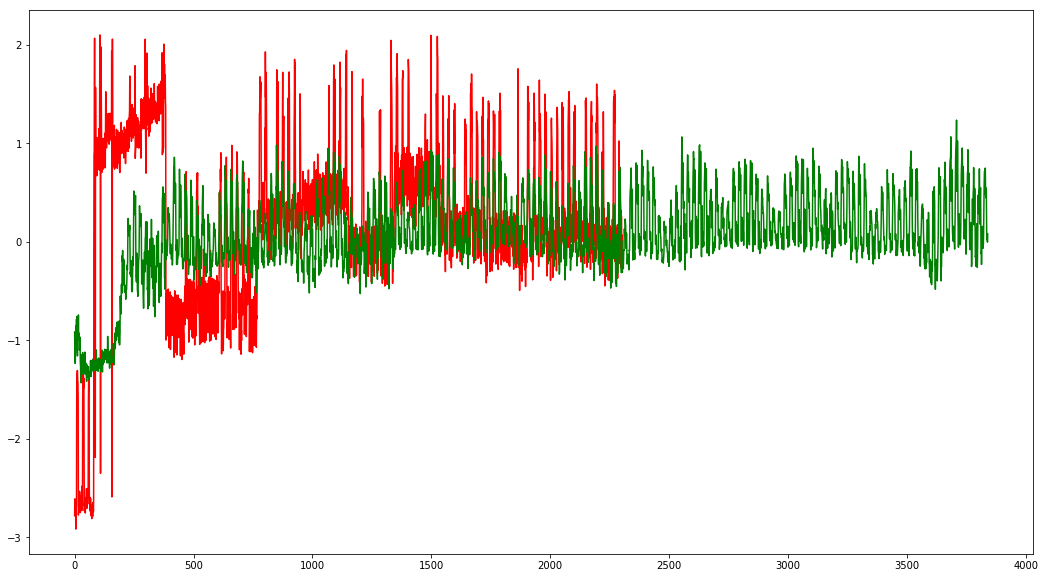

In [172]:
plt.plot(range(ag_y_test.ravel().shape[0]), ag_y_test.ravel(), color='red')
plt.plot(range(y_pred.ravel().shape[0]), y_pred.ravel(), color='green')